# Iniziamo con la fase di preprocessing e test dei modelli

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [4]:
df = pd.read_csv('archive/tracks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

### Per via della poca potenza computazionale campioniamo 🥲

In [8]:
SAMPLE_SIZE = 50000
df2 = df.sample(n=SAMPLE_SIZE, random_state=42)
df2 = df2.drop(columns=['id', 'name', 'release_date', 'id_artists', 'artists'])
df2 = df2.dropna()

In [9]:
df2

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
241517,21,105015,0,0.890,0.6680,9,-10.044,0,0.0533,0.5700,0.000002,0.0591,0.9420,137.934,4
444213,37,234800,0,0.663,0.5510,1,-6.445,1,0.0280,0.6970,0.000000,0.1800,0.3390,128.992,4
106480,10,147733,0,0.376,0.0979,2,-18.280,1,0.0350,0.4850,0.000577,0.1150,0.2360,90.290,3
141137,29,194373,0,0.565,0.3270,5,-13.843,1,0.0295,0.7810,0.000011,0.1310,0.5560,103.256,3
586550,55,172500,0,0.582,0.9790,11,-2.492,0,0.0714,0.1250,0.001520,0.3390,0.1960,128.010,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228435,17,424800,0,0.526,0.0145,5,-7.474,1,0.0379,0.3670,0.000003,0.1450,0.9550,115.975,4
141196,26,193027,0,0.731,0.9640,9,-5.864,1,0.0561,0.0135,0.014000,0.0730,0.7020,120.569,4
13330,0,650013,0,0.130,0.1910,1,-15.278,1,0.0468,0.9710,0.806000,0.1740,0.0546,68.230,3
546967,25,150140,0,0.247,0.1040,5,-23.253,0,0.0397,0.9900,0.930000,0.1530,0.0365,117.714,4


In [10]:
#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
minmax = MinMaxScaler()

df2.info()

df_scalato = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df_minmax = pd.DataFrame(minmax.fit_transform(df2), columns = df2.columns)

lista_df = [df2, df_scalato, df_minmax]

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 241517 to 356060
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  int64  
 1   duration_ms       50000 non-null  int64  
 2   explicit          50000 non-null  int64  
 3   danceability      50000 non-null  float64
 4   energy            50000 non-null  float64
 5   key               50000 non-null  int64  
 6   loudness          50000 non-null  float64
 7   mode              50000 non-null  int64  
 8   speechiness       50000 non-null  float64
 9   acousticness      50000 non-null  float64
 10  instrumentalness  50000 non-null  float64
 11  liveness          50000 non-null  float64
 12  valence           50000 non-null  float64
 13  tempo             50000 non-null  float64
 14  time_signature    50000 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 6.1 MB


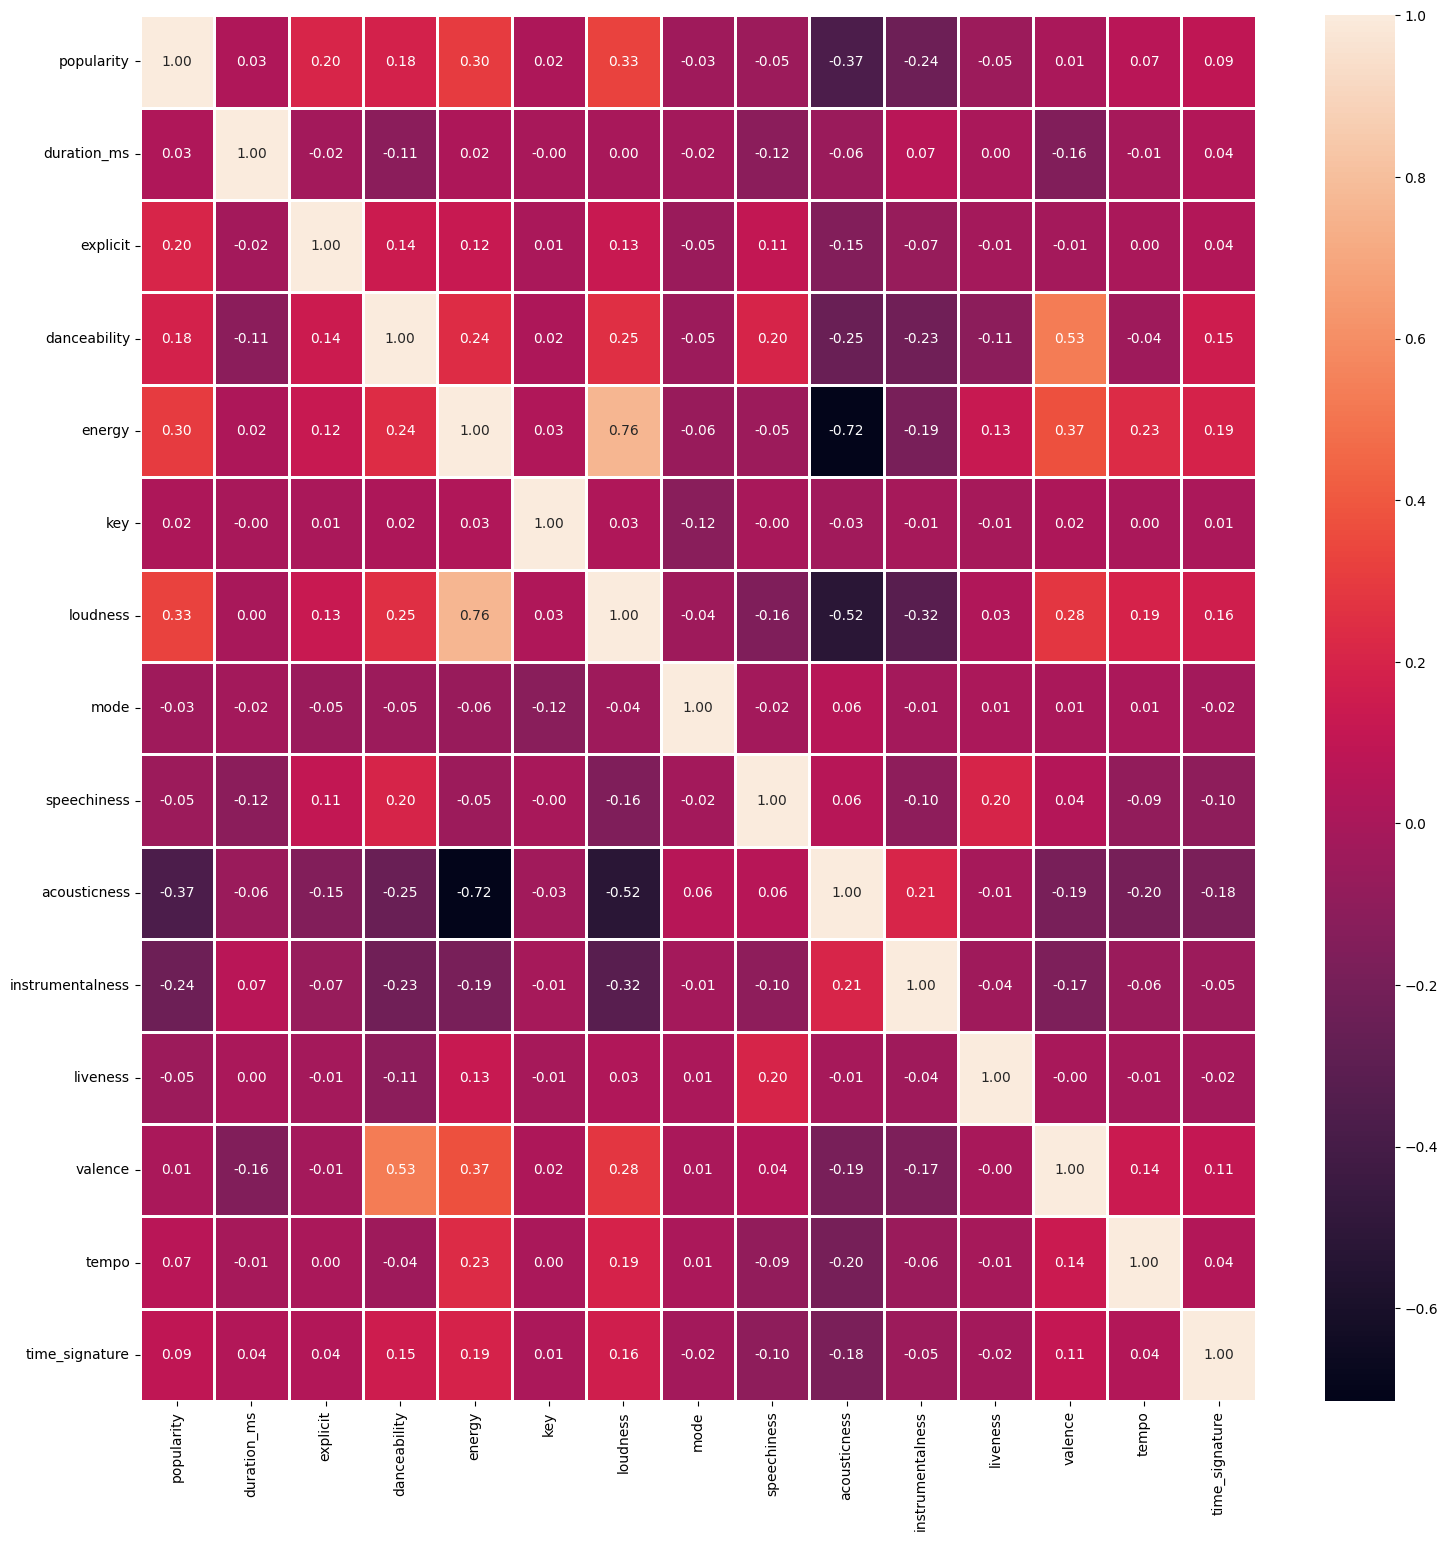

In [11]:
fig, ax = plt.subplots(figsize=(18,18))

sns.heatmap(
    df2.corr(numeric_only=True),
    ax=ax,
    annot=True, #per vedere i numeri oltre che il mero grafico
    fmt='.2f', #decimali considerati
    linewidths=1 #linea separazione
    )

plt.show()

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

linearreg = LinearRegression()
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)
decisiontree = DecisionTreeRegressor(max_depth=10, random_state=42)
randomforest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
knn = KNeighborsRegressor()
gradient = GradientBoostingRegressor(n_estimators=100, random_state=42)

xgboost = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1)

lgbm = LGBMRegressor(n_estimators=200, max_depth=6)


lista_modelli = [linearreg, lasso, ridge, decisiontree, randomforest, knn, gradient, xgboost, lgbm]

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def addestra_modello(df, modello, target):
    
    X = df[[col for col in df.columns if col != target]]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modello.fit(X_train, y_train)

    y_predetta_con_X_test = modello.predict(X_test)
    y_predetta_con_X_train = modello.predict(X_train)

    mae_test = mean_absolute_error(y_test, y_predetta_con_X_test)
    mae_train = mean_absolute_error(y_train, y_predetta_con_X_train)

    mse_test = mean_squared_error(y_test, y_predetta_con_X_test)
    mse_train = mean_squared_error(y_train, y_predetta_con_X_train)

    r2_test = r2_score(y_test, y_predetta_con_X_test)
    r2_train = r2_score(y_train, y_predetta_con_X_train)

    rmse_test = np.sqrt(mse_test)
    rmse_train = np.sqrt(mse_train)

    return mae_test, mae_train, r2_test, r2_train, mse_test, mse_train, rmse_test, rmse_train

In [21]:
def risultati_predizioni(lista_df, lista_modelli, target):

    risultati = []
    
    print(f'''
df1 = df pulito
df2 = df scalato
df3 = df minmax
_________________________________________      
''')
    contatore = 1  
    for df in lista_df:
        print(f'\n Risultati per df{contatore}\n')
        for modello in lista_modelli:
            mae_test,mae_train,r2_test,r2_train,mse_test,mse_train,rmse_test,rmse_train=addestra_modello(df,modello,target)
            print(f'''
in base all\' addestramento del modello {type(modello).__name__} e calcolate le metriche ne deriva che:
    mae_test : {mae_test}
    mae_train : {mae_train}
    mse_test : {mse_test}
    mse_train : {mse_train}
    r2_test : {r2_test}
    r2_train : {r2_train}
    rmse_test : {rmse_test}
    rmse_train : {rmse_train}
''')
            risultati.append({
        'model': type(modello).__name__,
        'mae_test': mae_test, 'mse_test': mse_test, 'rmse_test': rmse_test, 'r2_test': r2_test,
        'mae_train': mae_train, 'mse_train': mse_train, 'rmse_train': rmse_train, 'r2_train': r2_train
    })
            
        contatore +=1
    
    df_risultati = pd.DataFrame(risultati).sort_values('r2_test', ascending=False)
    display(df_risultati)  

    #me lo sparo a grafico
    plt.figure(figsize=(16,6))
    plt.bar(df_risultati['model'], df_risultati['r2_test'])
    plt.title('Confronto R2 (test) per modello')
    plt.ylabel('R2 (test)')
    plt.xlabel('Modello')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.show()


df1 = df pulito
df2 = df scalato
df3 = df minmax
_________________________________________      


 Risultati per df1


in base all' addestramento del modello LinearRegression e calcolate le metriche ne deriva che:
    mae_test : 13.052246212782093
    mae_train : 13.089660597547494
    mse_test : 258.21710671508424
    mse_train : 260.2137914866322
    r2_test : 0.2203609751580693
    r2_train : 0.22387537519036438
    rmse_test : 16.069135219889223
    rmse_train : 16.13114352693671


in base all' addestramento del modello Lasso e calcolate le metriche ne deriva che:
    mae_test : 13.91465643717681
    mae_train : 14.017707916502387
    mse_test : 287.90466319594776
    mse_train : 291.6177254065126
    r2_test : 0.1307248628217207
    r2_train : 0.1302086779262961
    rmse_test : 16.967753628455
    rmse_train : 17.07681836310595


in base all' addestramento del modello Ridge e calcolate le metriche ne deriva che:
    mae_test : 13.052370267378118
    mae_train : 13.08981718303200

,model,mae_test,mse_test,rmse_test,r2_test,mae_train,mse_train,rmse_train,r2_train
8,LGBMRegressor,11.816329,220.599428,14.852590,0.333941,10.824854,187.087080,13.677978,0.441986
26,LGBMRegressor,0.125768,0.024984,0.158064,0.333456,0.115042,0.021107,0.145282,0.443738
17,LGBMRegressor,0.646541,0.660286,0.812580,0.333216,0.591441,0.557791,0.746854,0.443562
16,XGBRegressor,0.646176,0.660582,0.812762,0.332917,0.558410,0.503081,0.709282,0.498138
25,XGBRegressor,0.125717,0.025004,0.158128,0.332917,0.108642,0.019043,0.137995,0.498138
7,XGBRegressor,11.817420,220.938507,14.864000,0.332917,10.212352,168.260727,12.971535,0.498138
13,RandomForestRegressor,0.652017,0.669623,0.818305,0.323787,0.601336,0.571833,0.756196,0.429554
22,RandomForestRegressor,0.126853,0.025353,0.159226,0.323614,0.116985,0.021647,0.147130,0.429493
4,RandomForestRegressor,11.924404,224.055863,14.968496,0.323505,10.996508,191.270032,13.830041,0.429510
15,GradientBoostingRegressor,0.664731,0.684887,0.827579,0.308373,0.655726,0.669135,0.818007,0.332488


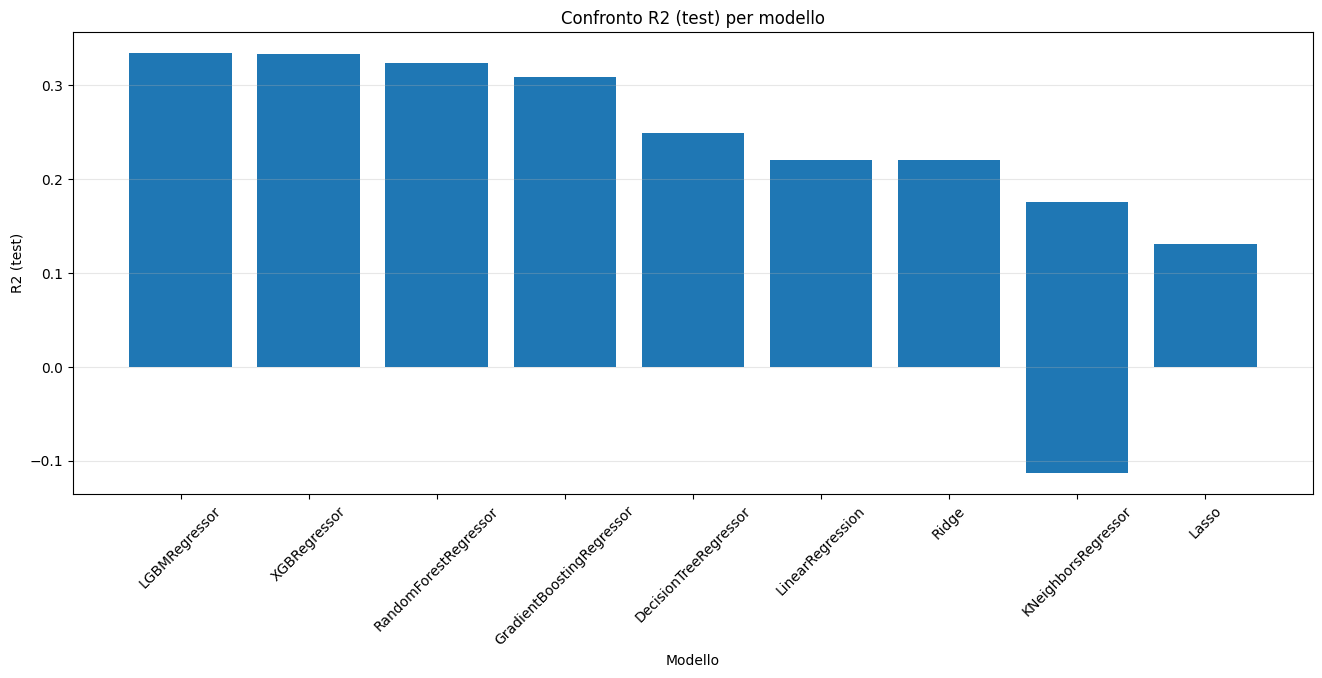

In [24]:
risultati_predizioni(lista_df, lista_modelli, target='popularity')

# C'è puzza di overfitting

# 🏆 TOP 3 MODELLI - Risultati Primo Test (50k dati)

## 🥇 PRIMO POSTO - LGBMRegressor (R² = 0.334)
Il **LightGBM** si prende la medaglia d'oro! Con un R² di 0.334 riesce a spiegare circa il **33% della varianza** dei dati. Non male per un primo giro con solo 50k campioni su 500k disponibili!

**Perché vince?** È velocissimo, efficiente e gestisce bene feature complesse senza bisogno di troppo tuning.

---

## 🥈 SECONDO POSTO - XGBRegressor (R² = 0.333)
**XGBoost** quasi alla pari con LightGBM! La differenza è minima (0.001), quindi praticamente un pareggio. Anche lui spiega il **33% della varianza** e tipicamente migliora molto con hyperparameter tuning.

**Potenziale:** Con GridSearchCV potrebbe facilmente superare LightGBM!

---

## 🥉 TERZO POSTO - RandomForestRegressor (R² = 0.324)
Il buon vecchio **Random Forest** si piazza terzo con R² = 0.324. Affidabile e robusto, ma leggermente dietro ai gradient boosting models.

**Nota:** La differenza train-test è piccola, quindi generalizza bene senza troppo overfitting! ✅

---

## 🎯 ORA: **Usiamo TUTTI i 500k dati** → R² probabilmente salirà, speriamo 🎰


df1 = df pulito
df2 = df scalato
df3 = df minmax
_________________________________________      


 Risultati per df1


in base all' addestramento del modello LinearRegression e calcolate le metriche ne deriva che:
    mae_test : 13.076420768796423
    mae_train : 13.130941832034155
    mse_test : 260.05694032678645
    mse_train : 261.53337797262583
    r2_test : 0.22282513300472406
    r2_train : 0.2266794857004638
    rmse_test : 16.126281044518183
    rmse_train : 16.171993630119506


in base all' addestramento del modello Lasso e calcolate le metriche ne deriva che:
    mae_test : 13.978746857035578
    mae_train : 14.083886702571036
    mse_test : 290.18205871678293
    mse_train : 293.8487149956915
    r2_test : 0.13279683055472047
    r2_train : 0.13112719619860258
    rmse_test : 17.03473095522154
    rmse_train : 17.14201607150371


in base all' addestramento del modello Ridge e calcolate le metriche ne deriva che:
    mae_test : 13.076431264596108
    mae_train : 13.1309552

,model,mae_test,mse_test,rmse_test,r2_test,mae_train,mse_train,rmse_train,r2_train
7,XGBRegressor,11.587690,214.435379,14.643612,3.591642e-01,11.468139,209.618484,14.478207,0.380185
16,XGBRegressor,0.630773,0.635402,0.797121,3.591642e-01,0.624265,0.621129,0.788117,0.380185
25,XGBRegressor,0.115877,0.021444,0.146436,3.591642e-01,0.114681,0.020962,0.144782,0.380185
17,LGBMRegressor,0.634563,0.640960,0.800600,3.535582e-01,0.632384,0.635417,0.797130,0.365928
26,LGBMRegressor,0.116563,0.021633,0.147082,3.535004e-01,0.116215,0.021461,0.146496,0.365424
8,LGBMRegressor,11.658394,216.466800,14.712811,3.530934e-01,11.621725,214.679522,14.651946,0.365220
4,RandomForestRegressor,11.877080,224.252809,14.975073,3.298250e-01,11.776480,219.840549,14.827021,0.349960
13,RandomForestRegressor,0.646551,0.664505,0.815172,3.298117e-01,0.641066,0.651407,0.807098,0.349971
22,RandomForestRegressor,0.118773,0.022426,0.149754,3.297996e-01,0.117765,0.021984,0.148270,0.349961
6,GradientBoostingRegressor,12.093901,227.825421,15.093887,3.191484e-01,12.140044,229.073353,15.135169,0.322660


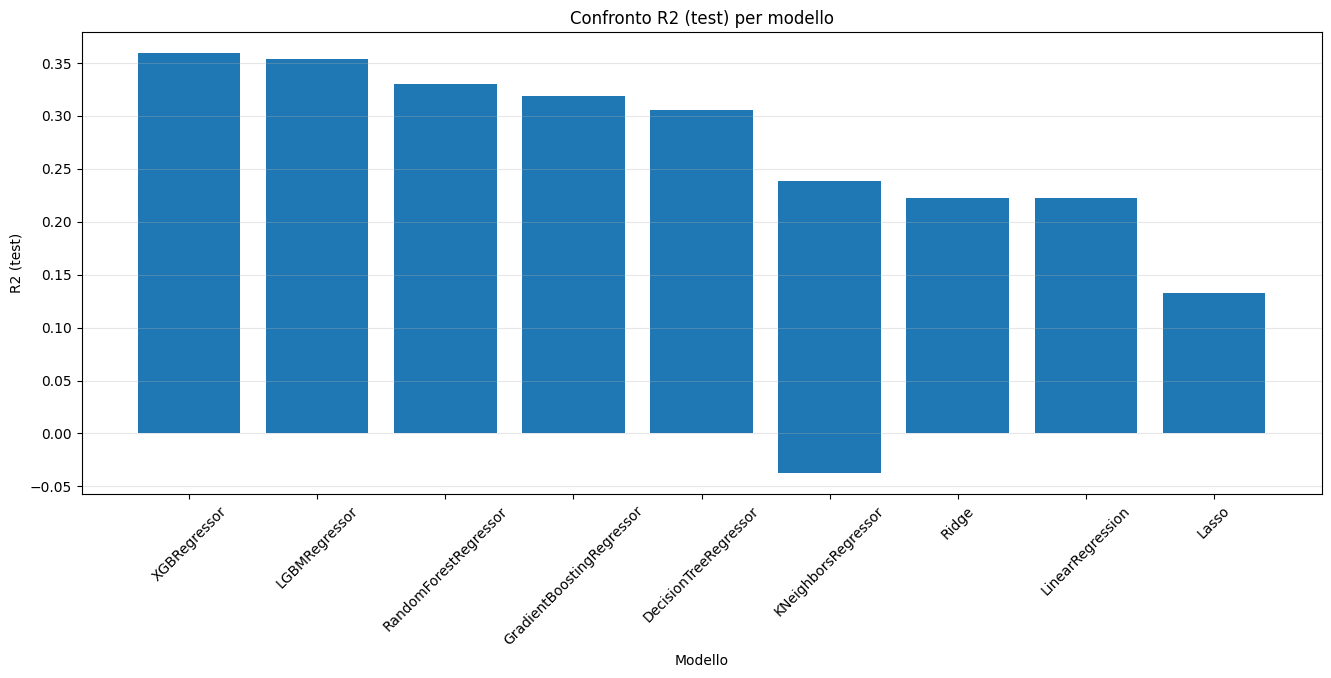

In [28]:
df_tot = df.drop(columns=['id', 'name', 'release_date', 'id_artists', 'artists'])
df_tot = df_tot.dropna()

df_tot_scalato = pd.DataFrame(scaler.fit_transform(df_tot), columns=df_tot.columns)
df_tot_minmax = pd.DataFrame(minmax.fit_transform(df_tot), columns = df_tot.columns)

lista_df = [df_tot, df_tot_scalato, df_tot_minmax]

risultati_predizioni(lista_df, lista_modelli, target='popularity')

In [29]:
def splittagio_e_X_y(df, target):
    X = df[[col for col in df.columns if col != target]]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X, y, X_train, X_test, y_train, y_test

In [30]:
def final_step(dic_df_tot, dic_models, params):
    '''
    Per questa funzione ricordarsi di passare DIZIONARI di df, modelli e parametri
    '''
    for nome_model, model in dic_models.items():
        print(f'===NOME MODELLO: {nome_model}===\n\n')
        for nome_df,dataframe in dic_df_tot.items():
            print(f'## Test con: {nome_df} ##\n\n')

            X, y, X_train, X_test, y_train, y_test = splittagio_e_X_y(dataframe, target='popularity')

            search = GridSearchCV(model, param_grid = params, cv=5, scoring='r2', n_jobs=-1)
            search.fit(X_train, y_train)
            best = search.best_estimator_

            y_pred_ = best.predict(X_test)
            print("\nPrestazioni sul test set:")
            print("MAE:", mean_absolute_error(y_test, y_pred_))
            print("MSE:", mean_squared_error(y_test, y_pred_))
            print("R2:", r2_score(y_test, y_pred_))
            print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_)))

            importances = best.feature_importances_
            feature_names = X.columns 

            # DataFrame per plot
            feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(12, 6))
            sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', hue='Feature', palette='viridis',legend=False)
            plt.title(f'Top 10 Fattori Chiave per la Popolarità (Secondo {nome_model.upper()})')
            plt.xlabel('Importanza')
            plt.ylabel(None)
            plt.show()

            residui = y_test - y_pred_

            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=y_pred_, y=residui, alpha=0.5)
            plt.axhline(0, color='red', linestyle='--', linewidth=2)
            plt.title(f'Analisi dei Residui {nome_model.upper()}')
            plt.xlabel('Valori Predetti (Popolarità)')
            plt.ylabel('Errore (Reale - Predetto)')
            plt.show()

    return best

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

===NOME MODELLO: xgbRegressor===


## Test con: df ##



Prestazioni sul test set:
MAE: 11.511564254760742
MSE: 212.8089599609375
R2: 0.3640247583389282
RMSE: 14.587973127235239


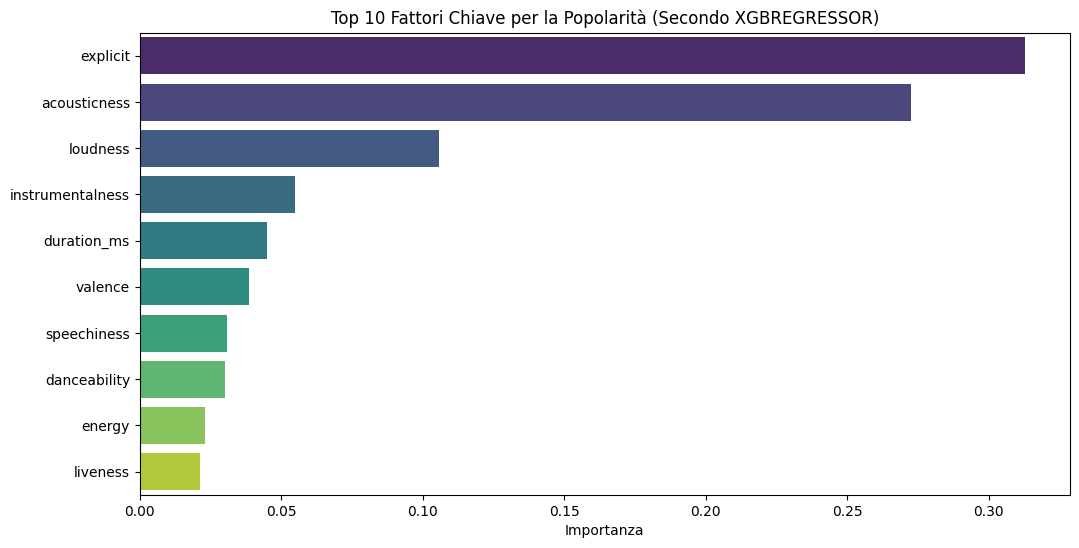

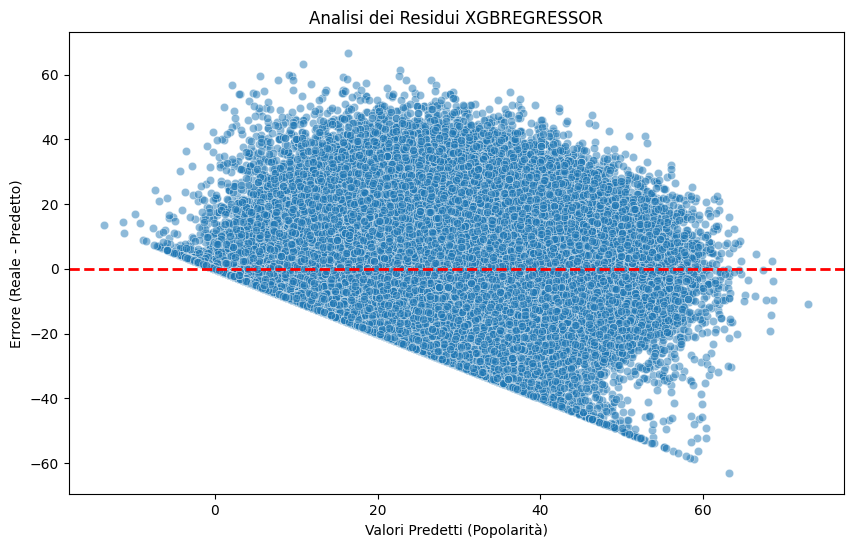

In [36]:
from sklearn.model_selection import GridSearchCV

df_tot = df.drop(columns=['id', 'name', 'release_date', 'id_artists', 'artists'])

dic_models = {'xgbRegressor' : XGBRegressor()}

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 10, 20, 30, None]
}

dic_df_tot = {'df':df_tot}

best = final_step(dic_df_tot, dic_models, params)

# Salviamo il file
Sono stanco capo 🫠

In [37]:
import joblib

nome_file = f'modello_spotify_XGBRegressor.pkl'
joblib.dump(best, nome_file)

print(f'''
Modello salvato nel file:\n#####\n{nome_file}\n#####\n
Ora potrò usare questo modello per capire su cosa concentrarmi per l' uscita di
'From Here', il mio brano math rock, su Spoty!
''')


Modello salvato nel file:
#####
modello_spotify_XGBRegressor.pkl
#####

Ora potrò usare questo modello per capire su cosa concentrarmi per l' uscita di
'From Here', il mio brano math rock, su Spoty!

